# Final Project Code - Surface Hydrology (71630)
Omer Eyal - 315044636

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import urllib.request
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import altair as alt
alt.data_transformers.disable_max_rows()
from scipy.stats import genextreme
from sklearn.linear_model import LinearRegression
import pyet
from noaa_ftp import NOAA
from pandas.plotting import register_matplotlib_converters
import scipy.stats
register_matplotlib_converters()  # datetime converter for a matplotlib

## Import and Download Data

### Precipitation

In [3]:
# Function for download precipitation data from NOAA
def download_data(station_name, station_code):
    url_daily = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    url_monthly = 'https://www.ncei.noaa.gov/data/gsom/access/'
#     download daily data - uncomment to make this work
    urllib.request.urlretrieve(url_daily + station_code + '.csv',
                               station_name + '_daily.csv')
    #download monthly data
    # urllib.request.urlretrieve(url_monthly + station_code + '.csv',
    #                            station_name + '_monthly.csv')
# download_data('YAZOO CITY 5 NNE', 'USC00229860')

In [4]:
# Read precipitation data
df_p = pd.read_csv('YAZOO CITY 5 NNE_daily.csv',
                 sep=",",
                 parse_dates=['DATE'],
                 index_col='DATE')
# IMPORTANT!! daily precipitation data is in tenths of mm, divide by 10 to get it in mm.
df_p['PRCP'] = df_p['PRCP'] / 10

/var/folders/98/_y_b86816bvdh7hzs_4fhc280000gn/T/ipykernel_16903/2303628244.py:2: DtypeWarning: Columns (29,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_p = pd.read_csv('YAZOO CITY 5 NNE_daily.csv',


In [5]:
df_p

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,...,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES,WT14,WT14_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",9.1,",,0,2400",0.0,",,0",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",8.4,",,0,2400",0.0,",,0",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",0.0,",,0,2400",0.0,",,0",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",0.0,",,0,2400",0.0,",,0",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",26.4,",,0,2400",0.0,",,0",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-27,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",10.2,",,7,0600",0.0,",,7",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-28,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",0.0,",,7,0600",0.0,",,7",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-29,USC00229860,32.9027,-90.3816,32.6,"YAZOO CITY 5 NNE, MS US",0.0,",,7,0600",0.0,",,7",0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Evapotasipration

In [6]:
# Get NOAA directory 
# noaa_dir = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01').dir()

In [7]:
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01').download('HEADERS.txt')
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2014').download('CRNS0101-05-2014-MS_Newton_5_ENE.txt')
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2015').download('CRNS0101-05-2015-MS_Newton_5_ENE.txt')
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2016').download('CRNS0101-05-2016-MS_Newton_5_ENE.txt')
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2017').download('CRNS0101-05-2017-MS_Newton_5_ENE.txt')
# noaa = NOAA("ftp.ncdc.noaa.gov", 'pub/data/uscrn/products/subhourly01/2018').download('CRNS0101-05-2018-MS_Newton_5_ENE.txt')

In [8]:
def read_noaa(year, headers='HEADERS.txt'):
    # Read column names from another file
    column_names = pd.read_csv('HEADERS.txt',
                            header=None,
                            sep='\s+',
                            )
    # Read CSV file using column names from another file
    df = pd.read_csv(year,  # file to read
                    sep='\s+',  # use (any number of) white spaces as delimiter between columns
                    names=column_names.iloc[1],  # column names from row i=1 of "column_names"
                    na_values=[-99, -9999, -99999],  # substitute these values by NaN
                    )
    # make integer column LST_DATE as string
    df['LST_DATE'] = df['LST_DATE'].astype(str)#.apply(lambda x: f'{x:0>4}')
    # make integer column LST_DATE as string
    # pad numbers with 0 from the left, such that 15 becomes 0015
    df['LST_TIME'] = df['LST_TIME'].apply(lambda x: f'{x:0>4}')
    # combine both DATE and TIME 
    df['datetime'] = pd.to_datetime(df['LST_DATE'] + df['LST_TIME'], format='%Y%m%d%H%M')
    df = df.set_index('datetime')
    
    return df

In [9]:
# read the meteo data for 2014-2018
df_E_14 = read_noaa('CRNS0101-05-2014-MS_Newton_5_ENE.txt')
df_E_15 = read_noaa('CRNS0101-05-2015-MS_Newton_5_ENE.txt')
df_E_16 = read_noaa('CRNS0101-05-2016-MS_Newton_5_ENE.txt')
df_E_17 = read_noaa('CRNS0101-05-2017-MS_Newton_5_ENE.txt')
df_E_18 = read_noaa('CRNS0101-05-2018-MS_Newton_5_ENE.txt')

In [10]:
# resample data to daily mean
df_ET_14 = df_E_14[['AIR_TEMPERATURE',
            'RELATIVE_HUMIDITY',
            'WIND_1_5']].resample('D').mean()

df_ET_15 = df_E_15[['AIR_TEMPERATURE',
            'RELATIVE_HUMIDITY',
            'WIND_1_5']].resample('D').mean()

df_ET_16 = df_E_16[['AIR_TEMPERATURE',
            'RELATIVE_HUMIDITY',
            'WIND_1_5']].resample('D').mean()

df_ET_17 = df_E_17[['AIR_TEMPERATURE',
            'RELATIVE_HUMIDITY',
            'WIND_1_5']].resample('D').mean()

df_ET_18 = df_E_18[['AIR_TEMPERATURE',
            'RELATIVE_HUMIDITY',
            'WIND_1_5']].resample('D').mean()

In [11]:
# agregate into daily radiation and convert from W/m2 to MJ/m2/day
X1 = df_E_14['SOLAR_RADIATION'].resample('D').sum()
df_ET_14['SOLAR_RADIATION'] = X1 * 5 * 60 * 1e-6

X2 = df_E_15['SOLAR_RADIATION'].resample('D').sum()
df_ET_15['SOLAR_RADIATION'] = X2 * 5 * 60 * 1e-6

X3 = df_E_16['SOLAR_RADIATION'].resample('D').sum()
df_ET_16['SOLAR_RADIATION'] = X3 * 5 * 60 * 1e-6

X4 = df_E_17['SOLAR_RADIATION'].resample('D').sum()
df_ET_17['SOLAR_RADIATION'] = X4 * 5 * 60 * 1e-6

X5 = df_E_18['SOLAR_RADIATION'].resample('D').sum()
df_ET_18['SOLAR_RADIATION'] = X5 * 5 * 60 * 1e-6

In [12]:
# combine all the ET dataframes into one
dataframes = [df_ET_14, df_ET_15, df_ET_16, df_ET_17, df_ET_18]
combined_ET = pd.concat(dataframes)
combined_ET

,AIR_TEMPERATURE,RELATIVE_HUMIDITY,WIND_1_5,SOLAR_RADIATION
datetime,,,,
2013-12-31,2.492958,90.929577,0.578310,0.0000
2014-01-01,7.128125,87.802083,1.158472,5.7912
2014-01-02,6.210417,79.472222,3.337465,6.6204
2014-01-03,-1.944792,57.614583,1.690382,13.7781
2014-01-04,2.692014,74.135417,1.345694,12.3924
...,...,...,...,...
2018-12-27,15.229167,87.059028,3.497257,0.8109
2018-12-28,13.522917,89.204861,1.363611,6.1485
2018-12-29,8.612847,84.097222,1.601111,5.2245


### Streamflow

In [13]:
# Drainage area: 2340 square miles   
data_file1 = "BBR_discharge-1995-2010.dat"
df_q1 = pd.read_csv(data_file1,
                        header=32,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q1.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q1['date_and_time'] = df_q1['datetime'] + ' ' + df_q1['tz_cd'] # combine date+time into datetime
df_q1['date_and_time'] = pd.to_datetime(df_q1['date_and_time'])        # interpret datetime
df_q1 = df_q1.set_index('date_and_time')                          # make datetime the index
df_q1['discharge'] = df_q1['discharge'].astype(float)
df_q1['discharge'] = df_q1['discharge'] * 0.0283168 # convert cubic feet to m3


data_file2 = "BBR_discharge-2010-2024.dat"
df_q2 = pd.read_csv(data_file2,
                        header=32,                      # no headers needed, we'll do that later
                        delim_whitespace=True,            # blank spaces separate between columns
                        na_values=["Bkw"]  # substitute these values for missing (NaN) values
                )
df_q2.columns = ['agency_cd', 'site_no','datetime','tz_cd','EDT','discharge','code']                       # rename df columns with headers columns
df_q2['date_and_time'] = df_q2['datetime'] + ' ' + df_q2['tz_cd'] # combine date+time into datetime
df_q2['date_and_time'] = pd.to_datetime(df_q2['date_and_time'])        # interpret datetime
df_q2 = df_q2.set_index('date_and_time')                          # make datetime the index
df_q2['discharge'] = df_q2['discharge'].astype(float)
df_q2['discharge'] = df_q2['discharge'] * 0.0283168 # convert cubic feet to m3

df_q = pd.concat([df_q1, df_q2])
df_q

,agency_cd,site_no,datetime,tz_cd,EDT,discharge,code
date_and_time,,,,,,,
1995-10-01 02:00:00,USGS,7289730,1995-10-01,02:00,CDT,11.355037,A:[91]
1995-10-01 03:00:00,USGS,7289730,1995-10-01,03:00,CDT,11.355037,A:[91]
1995-10-01 04:00:00,USGS,7289730,1995-10-01,04:00,CDT,11.298403,A:[91]
1995-10-01 05:00:00,USGS,7289730,1995-10-01,05:00,CDT,11.241770,A:[91]
1995-10-01 06:00:00,USGS,7289730,1995-10-01,06:00,CDT,11.241770,A:[91]
...,...,...,...,...,...,...,...
2024-07-30 19:00:00,USGS,7289730,2024-07-30,19:00,CDT,12.516026,P
2024-07-30 20:00:00,USGS,7289730,2024-07-30,20:00,CDT,12.459392,P
2024-07-30 21:00:00,USGS,7289730,2024-07-30,21:00,CDT,12.459392,P


## Analizing Yazoo City's Area

### Precipitation

#### Plot Daily Data

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Daily Rainfall (mm)'),
 Text(0.5, 1.0, 'Yazoo City, Mississipi, 1960--2018')]

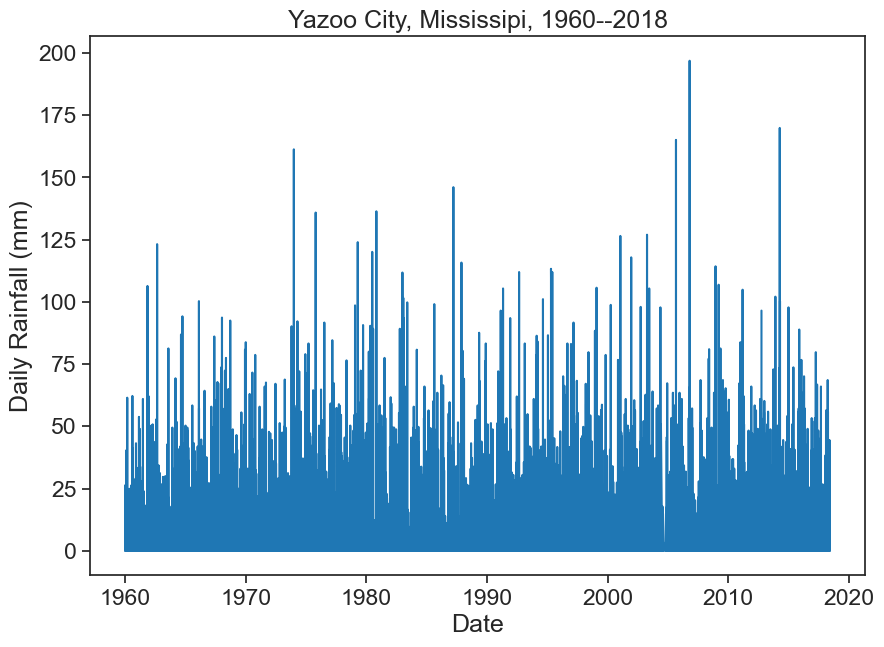

In [78]:
# Plot daily data
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_p['PRCP'], color='tab:blue')
ax.set(xlabel="Date",
       ylabel="Daily Rainfall (mm)",
       title="Yazoo City, Mississipi, 1960--2018"
      )

#### Plot Average Monthly Data

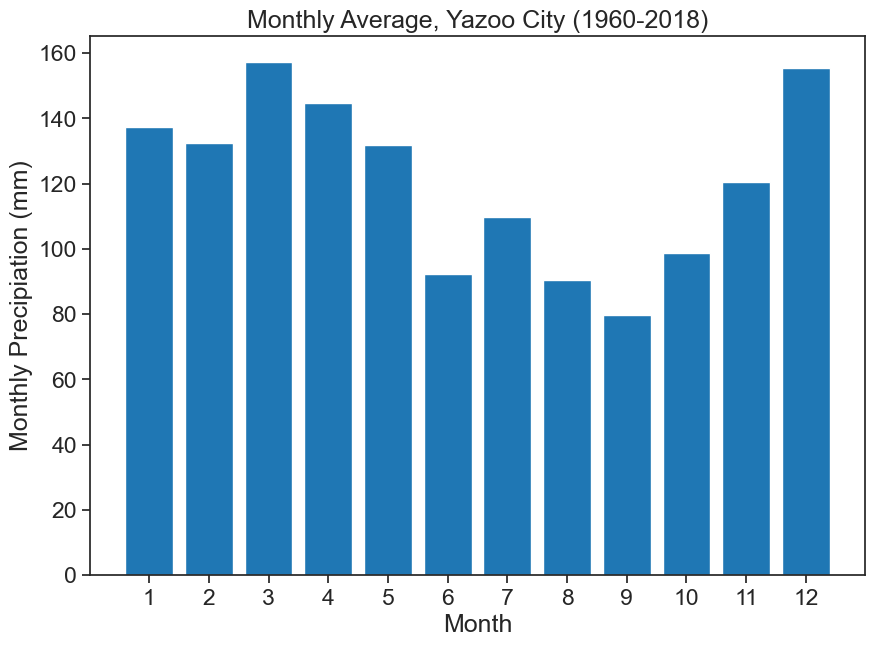

In [15]:
df_p_month = df_p['PRCP'].resample('M').sum().to_frame() # resample to monthly data
df_p_month_avg = (df_p_month['PRCP']   
                  .groupby(df_p_month.index.month)
                  .mean()
                  .to_frame()
               )  # make a df for monthly average (1960-2018)
# plot the monthly average precipitation
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(df_p_month_avg.index, df_p_month_avg['PRCP'], color='tab:blue')
ax.set(xlabel="Month",
       ylabel="Monthly Precipiation (mm)",
       title="Monthly Average, Yazoo City (1960-2018)",
       xticks=np.arange(1,13));

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Monthly Rainfall Average (mm)'),
 Text(0.5, 1.0, 'Monthly Average, Yazoo City (Hydrological Year) (1960-2018)'),
 [Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '1'),
  Text(5, 0, '2'),
  Text(6, 0, '3'),
  Text(7, 0, '4'),
  Text(8, 0, '5'),
  Text(9, 0, '6'),
  Text(10, 0, '7'),
  Text(11, 0, '8'),
  Text(12, 0, '9')]]

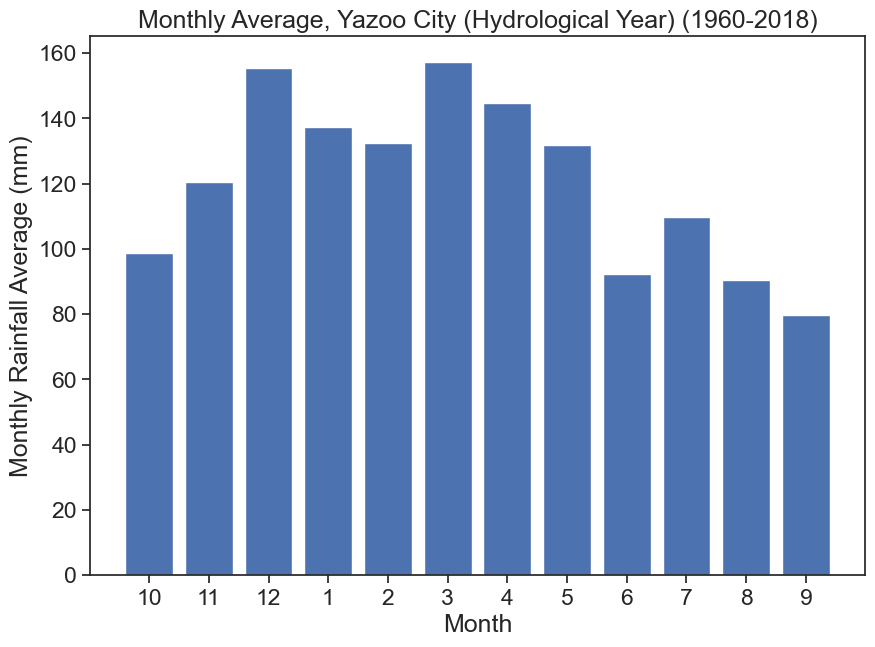

In [16]:
# plot monthly average precipitation by hydrological year (start on October)
fig, ax = plt.subplots(figsize=(10,7))
Nroll = 3  # number of months to roll
roll_yazoo = np.roll(df_p_month_avg['PRCP'], Nroll)
roll_months = np.roll(df_p_month_avg.index, Nroll)

ax.bar(df_p_month_avg.index, roll_yazoo)

ax.set(xlabel='Month',
       ylabel='Monthly Rainfall Average (mm)',
       title='Monthly Average, Yazoo City (Hydrological Year) (1960-2018)',
       xticks=df_p_month_avg.index,
       xticklabels=roll_months
      )

#### Seasonality

Text(0.5, 1.0, 'Monthly rainfall averages - Yazoo City')

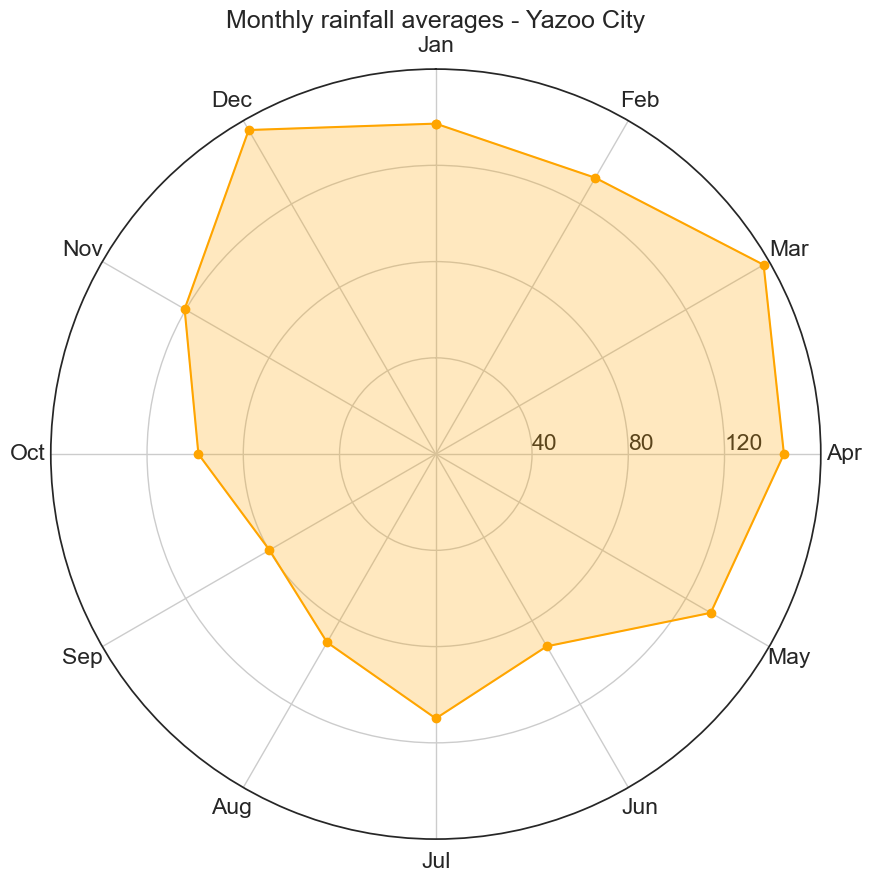

In [17]:
fig = plt.figure(figsize=(10,10))

# radar chart
ax = fig.add_subplot(111, polar=True)     # make polar plot
ax.set_theta_zero_location("N")           # January on top ("N"orth)
ax.set_theta_direction(-1)                # clockwise direction
ax.set_rlabel_position(90)                # radial labels on the right
ax.set_rticks([40,80,120])                   # two radial ticks is enough
ax.set_rlim(0,160)                        # limits of r axis
angles=np.linspace(0, 2*np.pi, 12, endpoint=False)       # divide circle into 12 slices
angles=np.append(angles, angles[0])                      # close loop, otherwise lines will be open
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_thetagrids(angles[:-1] * 180/np.pi, month_names)  # relabel angles with month names

# plot london data
stats = np.array(df_p_month_avg['PRCP'].values)        # get  data
stats = np.append(stats, stats[0])            # close loop
ax.plot(angles, stats, "o-", color='orange', label="Yazoo City")  # plot line
ax.fill(angles, stats, alpha=0.25, color='orange')            # fill


ax.set_title("Monthly rainfall averages - Yazoo City")


In [18]:
def walsh_index(df):
    m = df["PRCP"].values
    R = m.sum()
    SI = np.sum(np.abs(m-R/12)) / R
    return SI

yazoo_index = walsh_index(df_p_month_avg)
print(f"Seasonality index (Walsh and Lawler, 1981) for Yazoo City is {yazoo_index:.2f}")

Seasonality index (Walsh and Lawler, 1981) for Yazoo City is 0.18


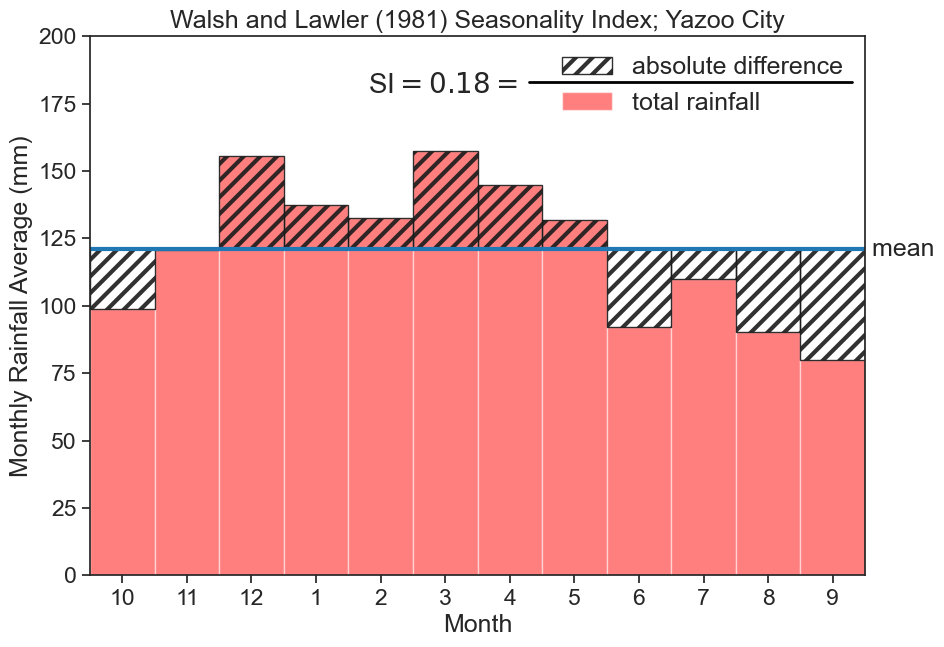

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

plt.rcParams['hatch.linewidth'] = 3
xlim = [1, 13]
total_yazoo = np.sum(roll_yazoo)
ax.plot(xlim, [total_yazoo/12]*2, color="tab:blue", linewidth=3)
ax.set_xlim(xlim)

shaded = roll_yazoo - total_yazoo/12
months = df_p_month_avg.index
ax.bar(months, shaded,
       alpha=0.9, color="None", width=1,
       hatch="//", edgecolor='k',
       align='edge', bottom=total_yazoo/12,
       label=f"absolute difference")

ax.bar(months, roll_yazoo,
       alpha=0.5, color="red", width=1,
       align='edge',
       label=f"total rainfall", zorder=0)

ax.text(5.3, 179, r"SI$=0.18=$", fontsize=20)
ax.text(xlim[-1], total_yazoo/12, " mean", va="center")
ax.plot([7.8, 12.8], [183]*2, color="black", lw=2)
# axes labels and figure title
ax.set(xlabel='Month',
       ylabel='Monthly Rainfall Average (mm)',
       title='Walsh and Lawler (1981) Seasonality Index; Yazoo City',
       xticks=np.arange(1.5,12.6,1),
       xticklabels=roll_months,
       ylim=[0,200]
      )

plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1, 1.005),
           fontsize=18);

# save figure
# plt.savefig("si_walsh_telaviv.png")

#### Interannual Variability

##### Monthly Data

[Text(0.5, 0, 'date'),
 Text(0, 0.5, 'monthly rainfall (mm)'),
 Text(0.5, 1.0, 'Yazoo City, Mississipi, 1960-2018')]

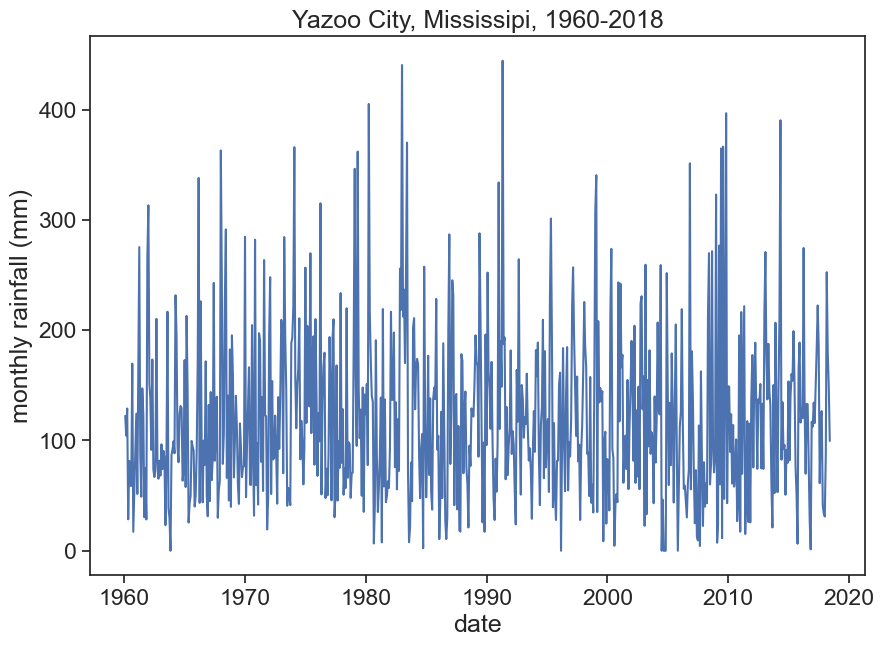

In [20]:
# Plot monthly data
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_p_month['PRCP'])
ax.set(xlabel="date",
       ylabel="monthly rainfall (mm)",
       title="Yazoo City, Mississipi, 1960-2018"
      )

##### Annual Precipitation

In [79]:
df_p_year = df_p['PRCP'].resample('A-SEP').sum().to_frame()  # yearly frequency, anchored end of September
df_p_year.columns = ['rain (mm)'] # rename 'PRCP' column to 'rain (mm)'
# the first and the last years is not a whole years, let's take it out
df_p_year = df_p_year.iloc[1:-1]  # exclude first and last row

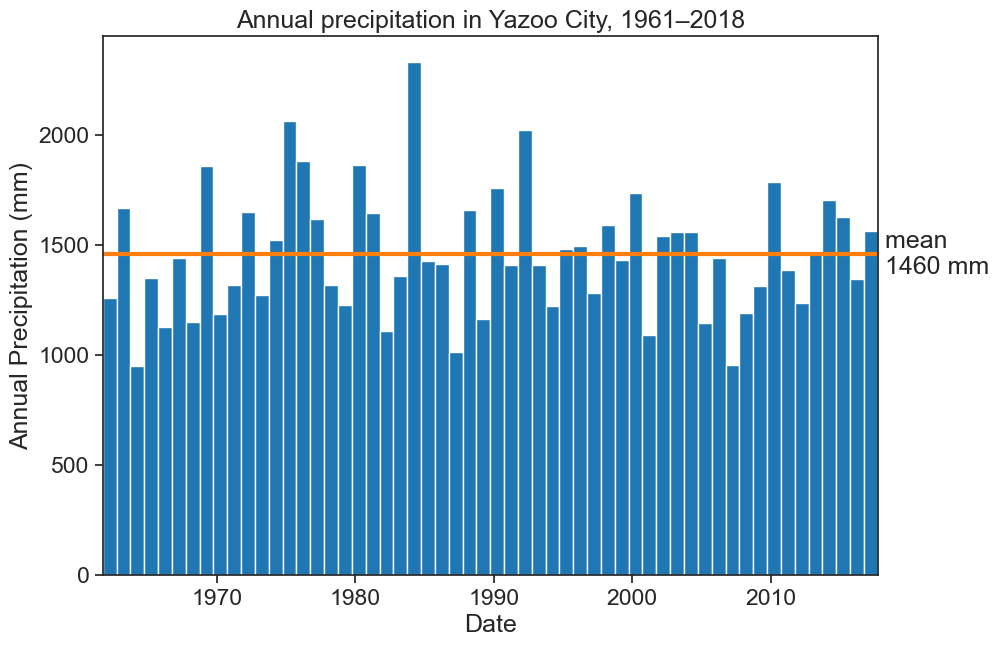

In [87]:
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY precipitation
ax.bar(df_p_year.index, df_p_year['rain (mm)'],
       width=365, align='edge', color="tab:blue")

# plot mean
rain_mean = df_p_year['rain (mm)'].mean()
ax.plot(df_p_year*0 + rain_mean, linewidth=3, color="tab:orange")

# adjust labels, ticks, title, etc
ax.set(title="Annual precipitation in Yazoo City, 1961–2018",
       xlabel="Date",
       ylabel="Annual Precipitation (mm)",
       xlim=[df_p_year.index[0], df_p_year.index[-1]]
      )

# write mean on the right
ax.text(df_p_year.index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");


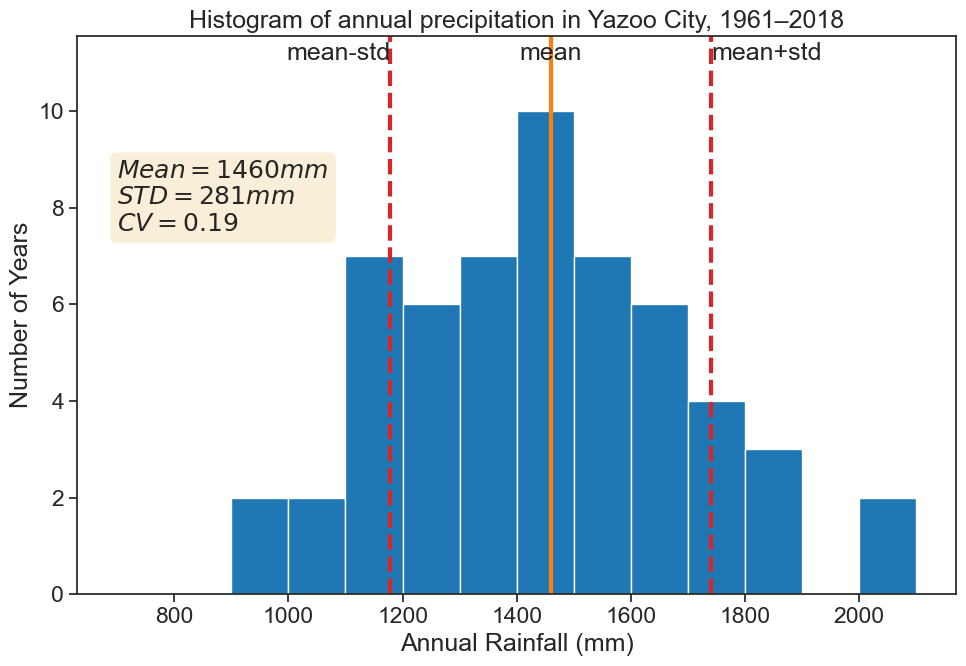

In [89]:
fig, ax = plt.subplots(figsize=(10,7))

# calculate mean and standard deviation
rain_mean = df_p_year['rain (mm)'].mean()
rain_std = df_p_year['rain (mm)'].std()
CV = rain_std/rain_mean
# plot histogram
b = np.arange(700, 2200, 100)  # bins from 0 to 55, width = 5
ax.hist(df_p_year, bins=b, color='tab:blue')

# plot vertical lines with mean, std, etc
ylim = np.array(ax.get_ylim())
ylim[1] = ylim[1]*1.1
ax.plot([rain_mean]*2, ylim, linewidth=3, color="tab:orange")
ax.plot([rain_mean+rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:red")
ax.plot([rain_mean-rain_std]*2, ylim, linewidth=3, linestyle="--", color="tab:red")
ax.set_ylim(ylim)

# write mean, std, etc
ax.text(rain_mean, ylim[1]*0.99, "mean",
        horizontalalignment="center",
        verticalalignment="top",
        )
ax.text(rain_mean+rain_std, ylim[1]*0.99, "mean+std",
        horizontalalignment="left",
        verticalalignment="top",
        )
ax.text(rain_mean-rain_std, ylim[1]*0.99, "mean-std",
        horizontalalignment="right",
        verticalalignment="top",
        )

# adjust labels, ticks, title, limits, etc
ax.set(title=f"Histogram of annual precipitation in Yazoo City, 1961–2018",
       xlabel="Annual Rainfall (mm)",
       ylabel="Number of Years"
       );

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(700, 9, f'$Mean= {rain_mean:.0f} mm$\n$STD = {rain_std:.0f}mm$\n$CV = {CV:.2f}$'
        , fontsize=18, verticalalignment='top', bbox=props)
plt.tight_layout()

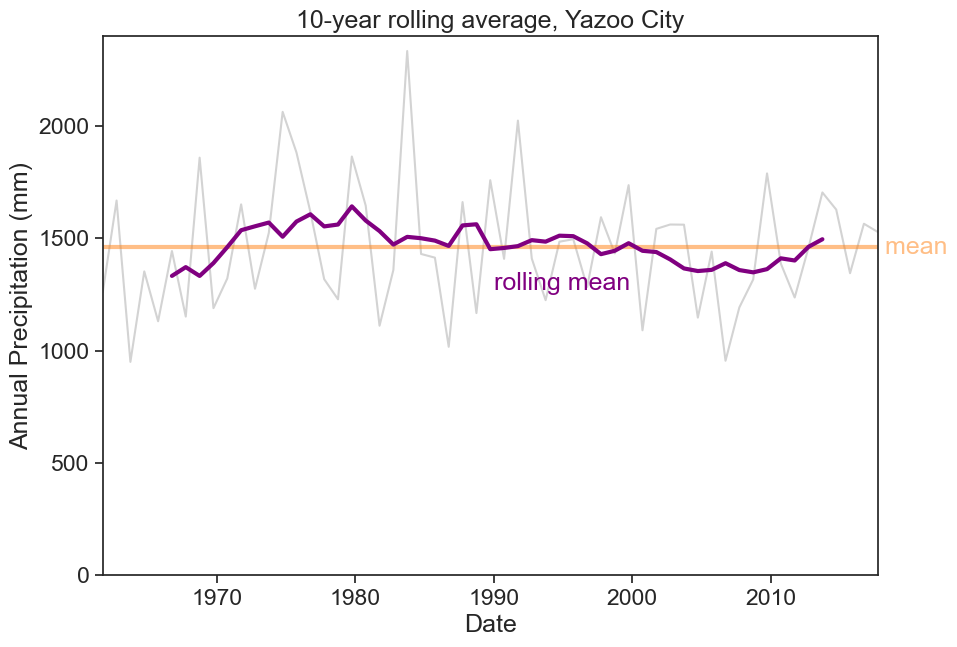

In [91]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(df_p_year['rain (mm)'], color="lightgray")

# plot rolling mean
rolling_mean = df_p_year.rolling(window=10, center=True).mean()
ax.plot(rolling_mean, linewidth=3, color="purple", zorder=5)
ax.text(pd.to_datetime("1990"), 1300, "rolling mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="purple",)

# plot mean
ax.plot(df_p_year*0 + rain_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_p_year.index[-1], rain_mean, " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5);

ax.set(title="10-year rolling average, Yazoo City",
       xlabel="Date",
       ylabel="Annual Precipitation (mm)",
       ylim=[0, 2400],
       xlim=[df_p_year.index[0], df_p_year.index[-1]]
      );


#### Return Time

##### Distribution of Annual Daily Maxima

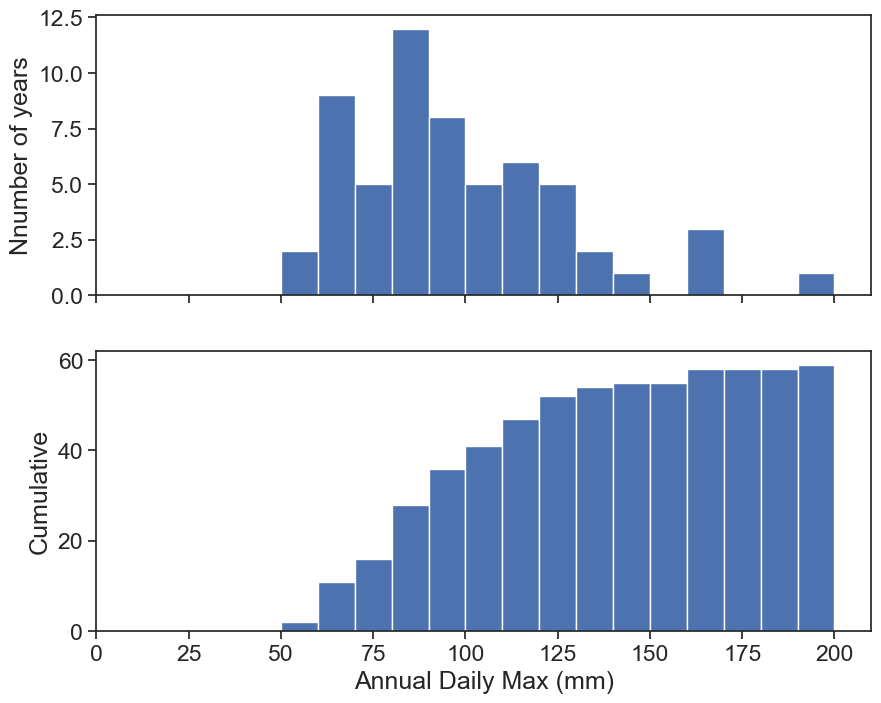

In [25]:
max_p_annual = (df_p['PRCP'].resample('A-SEP')  # find the max precipitation day for each year
                        .max()
                        .to_frame()
             )

#plot the distribution of the annual daily max 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)

h=max_p_annual['PRCP'].values

bins=np.arange(0,210,10)
ax1.hist(h, bins=bins)
ax2.hist(h, bins=bins, cumulative=1)

ax1.set(ylabel="Nnumber of years")
ax2.set(xlabel="Annual Daily Max (mm)",
        ylabel="Cumulative",
        xlim=[0,210]);

##### GEV with The Distribution

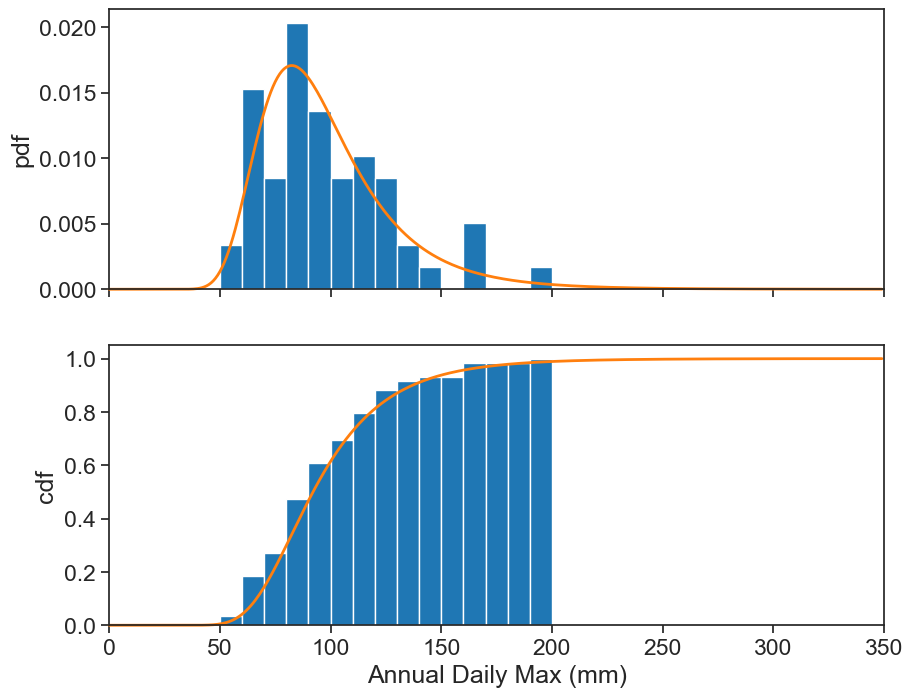

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)

ax1.hist(h, bins=bins, density=True, color='tab:blue')  #plot pdf of annual daily max  
ax2.hist(h, bins=bins, cumulative=1, density=True, color='tab:blue')    # plot cdf of annual daily max

params = genextreme.fit(h) # fit GEV model
rain_max = 350.0        # choose maximum for daily preciptation event
rain = np.arange(0,rain_max)
pdf = genextreme(c=params[0], loc=params[1], scale=params[2]).pdf
cdf = genextreme(c=params[0], loc=params[1], scale=params[2]).cdf
ax1.plot(rain, pdf(rain), color='tab:orange', clip_on=False, lw=2)      #plot pdf with GEV model
ax2.plot(rain, cdf(rain), color='tab:orange', clip_on=False, lw=2)      #plot cdf with GEV model


ax1.set(ylabel="pdf")
ax2.set(xlabel="Annual Daily Max (mm)",
        ylabel="cdf",
        xlim=[0,350]
        );

##### Retun Time form Data and GEV

In [27]:
# sort the annual daily precipitation maxima, from lowest to highest
max_p_annual['max_sorted'] = np.sort(max_p_annual['PRCP'])
# let's give it a name, h
h1 = max_p_annual['max_sorted'].values
# make an array "order" of size N=len(h), from 1 to N
N = len(h1)
rank = np.arange(N) + 1
# make a new array, "rank"
cdf_weibull = rank / (N+1)

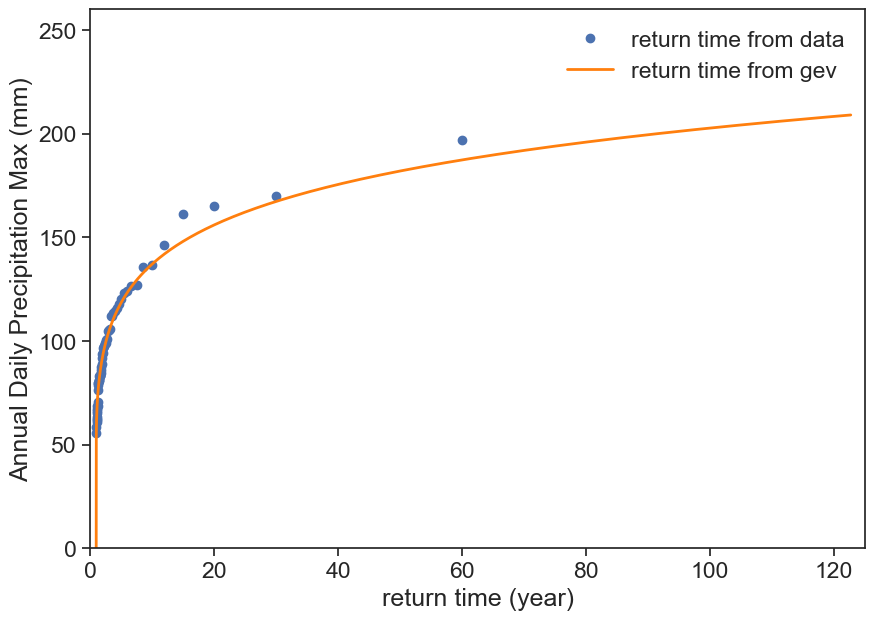

In [28]:
fig, ax = plt.subplots(figsize=(10,7))

T = 1 / (1-cdf_weibull) # compute return time from actual data
ax.plot(T, h1, 'o', label="return time from data") # plot return time from  data

rain = np.arange(0,210)
cdf_rain = genextreme(c=params[0], loc=params[1], scale=params[2]).cdf(rain)

ax.plot(1/(1-cdf_rain), rain, color='tab:orange', lw=2, label="return time from gev") # plot return time from GEV model
ax.legend(loc="upper right", frameon=False)
ax.set(xlabel="return time (year)",
       ylabel=f"Annual Daily Precipitation Max (mm)",
       xlim=[0, 125],
       ylim=[0, 260]);

In [29]:
# Compute the return levels for several return periods.
return_periods = np.array([5, 7, 10, 15, 20, 50, 100, 200, 500, 1000])
return_levels = genextreme.isf(1/return_periods, *params)
 
return_table = pd.DataFrame()
return_table['Period (years)'] = return_periods
return_table['Level (mm)'] = return_levels
return_table = return_table.set_index('Period (years)')

print("Return levels:")
print()
return_table

Return levels:



,Level (mm)
Period (years),
5,118.349172
7,127.416880
10,137.010862
15,148.010163
20,155.921132
50,181.956926
100,202.688980
200,224.448413
500,254.940209


### Evapotranspiration

#### Penman

In [54]:
elevation = 114 # elevation of Newton meteo station
penm = pyet.combination.penman(tmean=combined_ET["AIR_TEMPERATURE"],
                                wind=combined_ET["WIND_1_5"],
                                elevation=elevation,
                                rh=combined_ET["RELATIVE_HUMIDITY"],
                                rn=combined_ET["SOLAR_RADIATION"],
                                )   # compute the ET using Penman's equation
penm['2018-09-20'] = penm.mean() # fill a NaN value with the average mean

[Text(0.5, 1.0, 'PET 2014-2018, Newton, MS')]

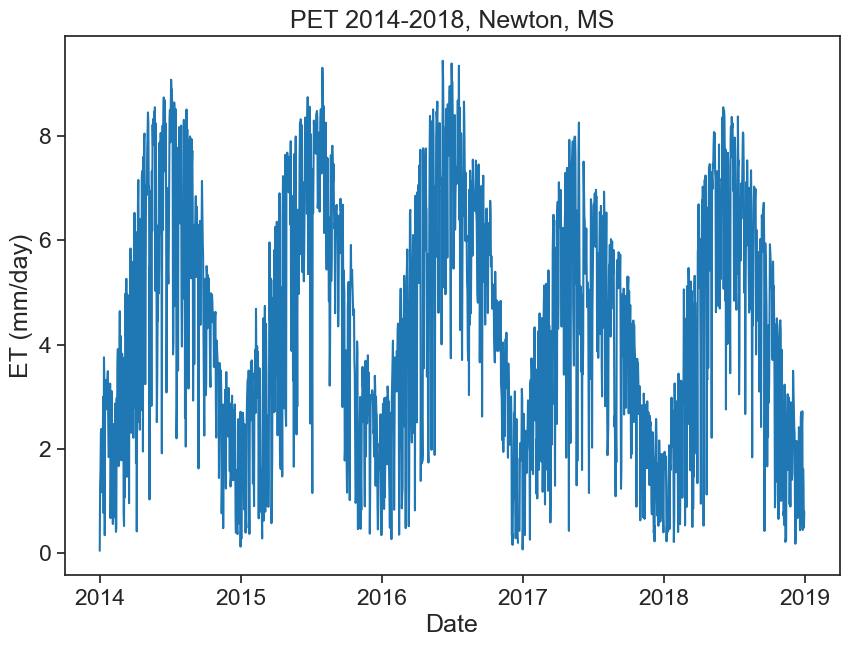

In [61]:
# plot daily PET for 2014-2018
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(penm, color='tab:blue')
ax.set_xlabel("Date")
ax.set_ylabel("ET (mm/day)")
ax.set(title='PET 2014-2018, Newton, MS')

#### Rolling Mean - Penman

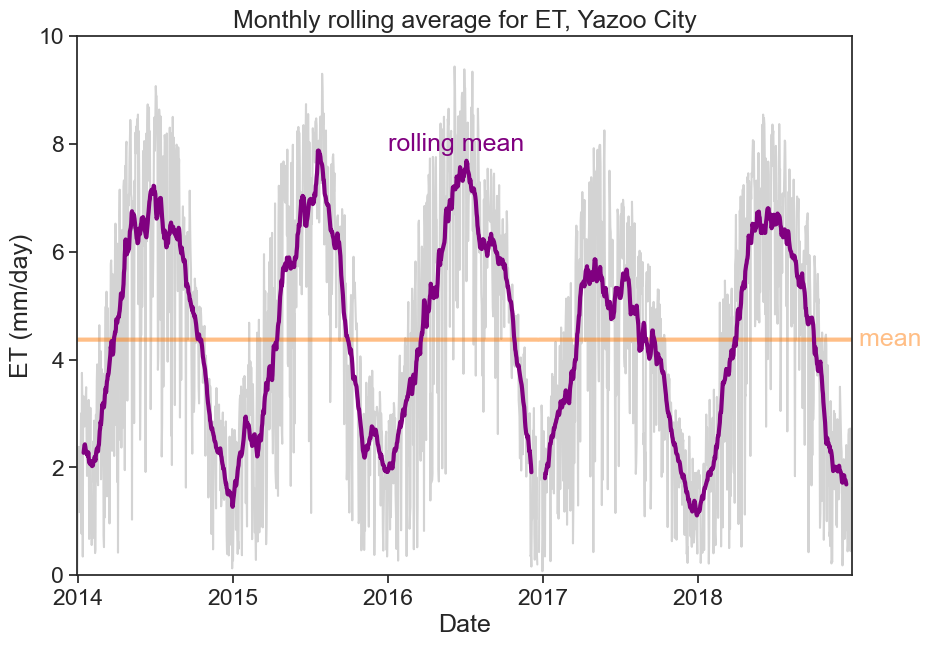

In [64]:
fig, ax = plt.subplots(figsize=(10,7))

# plot daily PET
ax.plot(penm, color="lightgray")

# plot rolling mean
rolling_mean = penm.rolling(window=30, center=True).mean()
ax.plot(rolling_mean, linewidth=3, color="purple", zorder=5)
ax.text(pd.to_datetime("2016"), 8, "rolling mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="purple",)

# plot mean
ax.plot(penm*0 + penm.mean(), linewidth=3, color="tab:orange", alpha=0.5)
ax.text(penm.index[-1], penm.mean(), " mean".format(rain_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5);

ax.set(title="Monthly rolling average for ET, Yazoo City",
       xlabel="Date",
       ylabel="ET (mm/day)",
       ylim=[0, 10],
       xlim=[penm.index[0], penm.index[-1]]
      );


#### Other Variables

In [33]:
es = pyet.meteo_utils.calc_es(tmean=combined_ET["AIR_TEMPERATURE"]) # compute saturated vapour pressure
ea = pyet.meteo_utils.calc_ea(tmean=combined_ET["AIR_TEMPERATURE"], # compute actual vapour pressure
                              rh=combined_ET["RELATIVE_HUMIDITY"])
vpd = es - ea

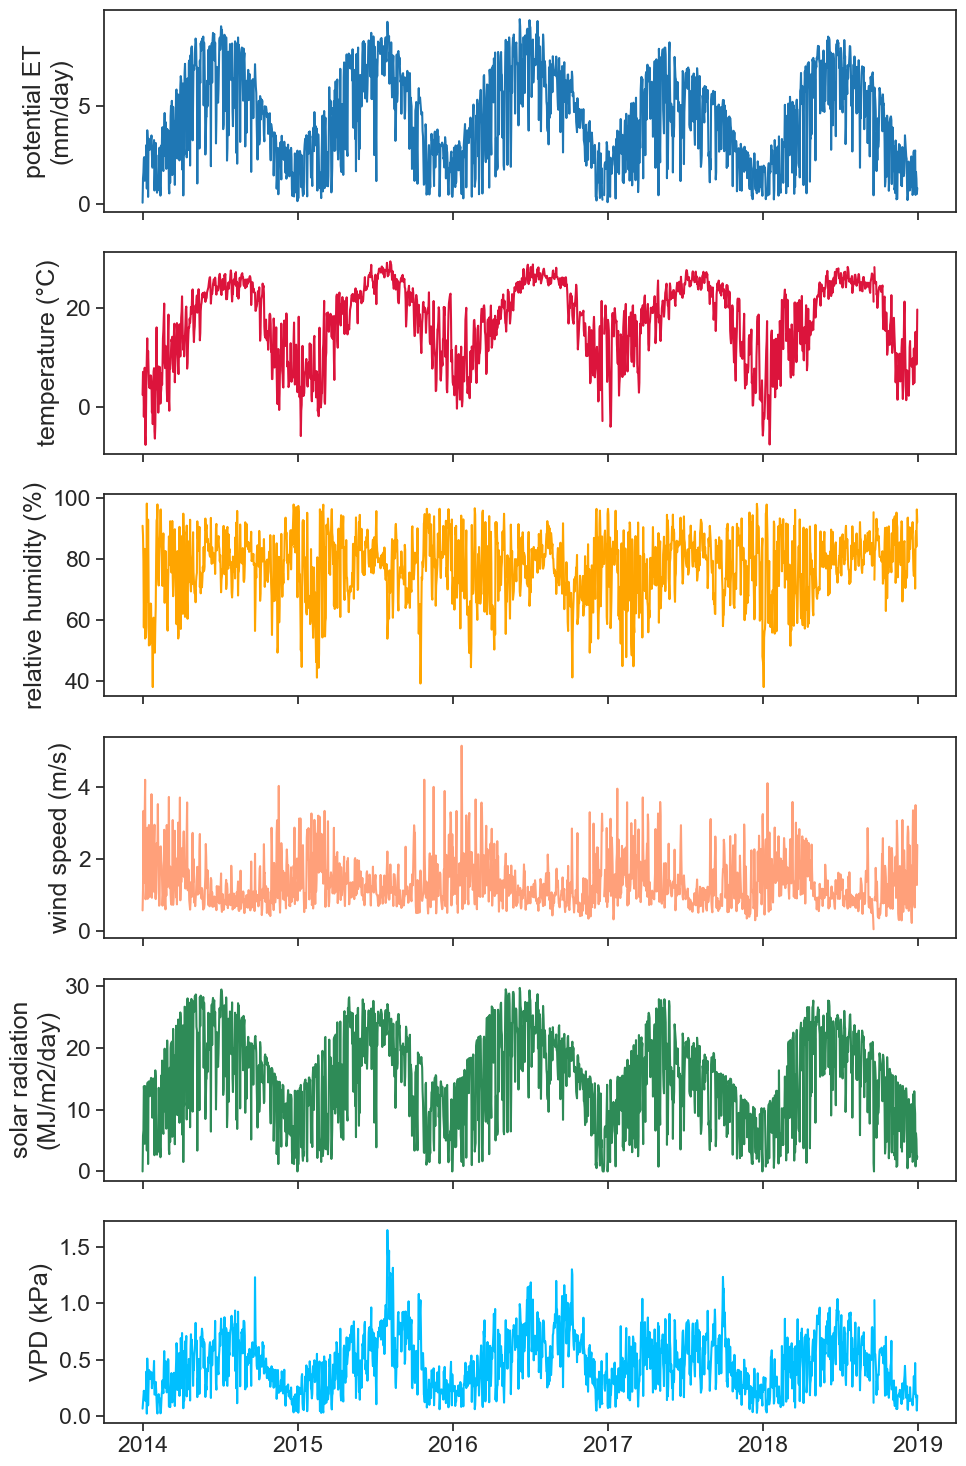

In [63]:
# plot PET with other variables
fig, ax = plt.subplots(6,1, figsize=(10,15), sharex=True)
ax[0].plot(penm, color='tab:blue'); ax[0].set_ylabel("potential ET\n(mm/day)")
ax[1].plot(combined_ET['AIR_TEMPERATURE'], color='crimson'); ax[1].set_ylabel("temperature (°C)")
ax[2].plot(combined_ET['RELATIVE_HUMIDITY'], color='orange'); ax[2].set_ylabel("relative humidity (%)")
ax[3].plot(combined_ET['WIND_1_5'], color='lightsalmon'); ax[3].set_ylabel("wind speed (m/s)")
ax[4].plot(combined_ET['SOLAR_RADIATION'], color='seagreen'); ax[4].set_ylabel("solar radiation\n(MJ/m2/day)")
ax[5].plot(vpd, color='deepskyblue'); ax[5].set_ylabel("VPD (kPa)")
plt.tight_layout()

#### Other Variables - Rolling Mean

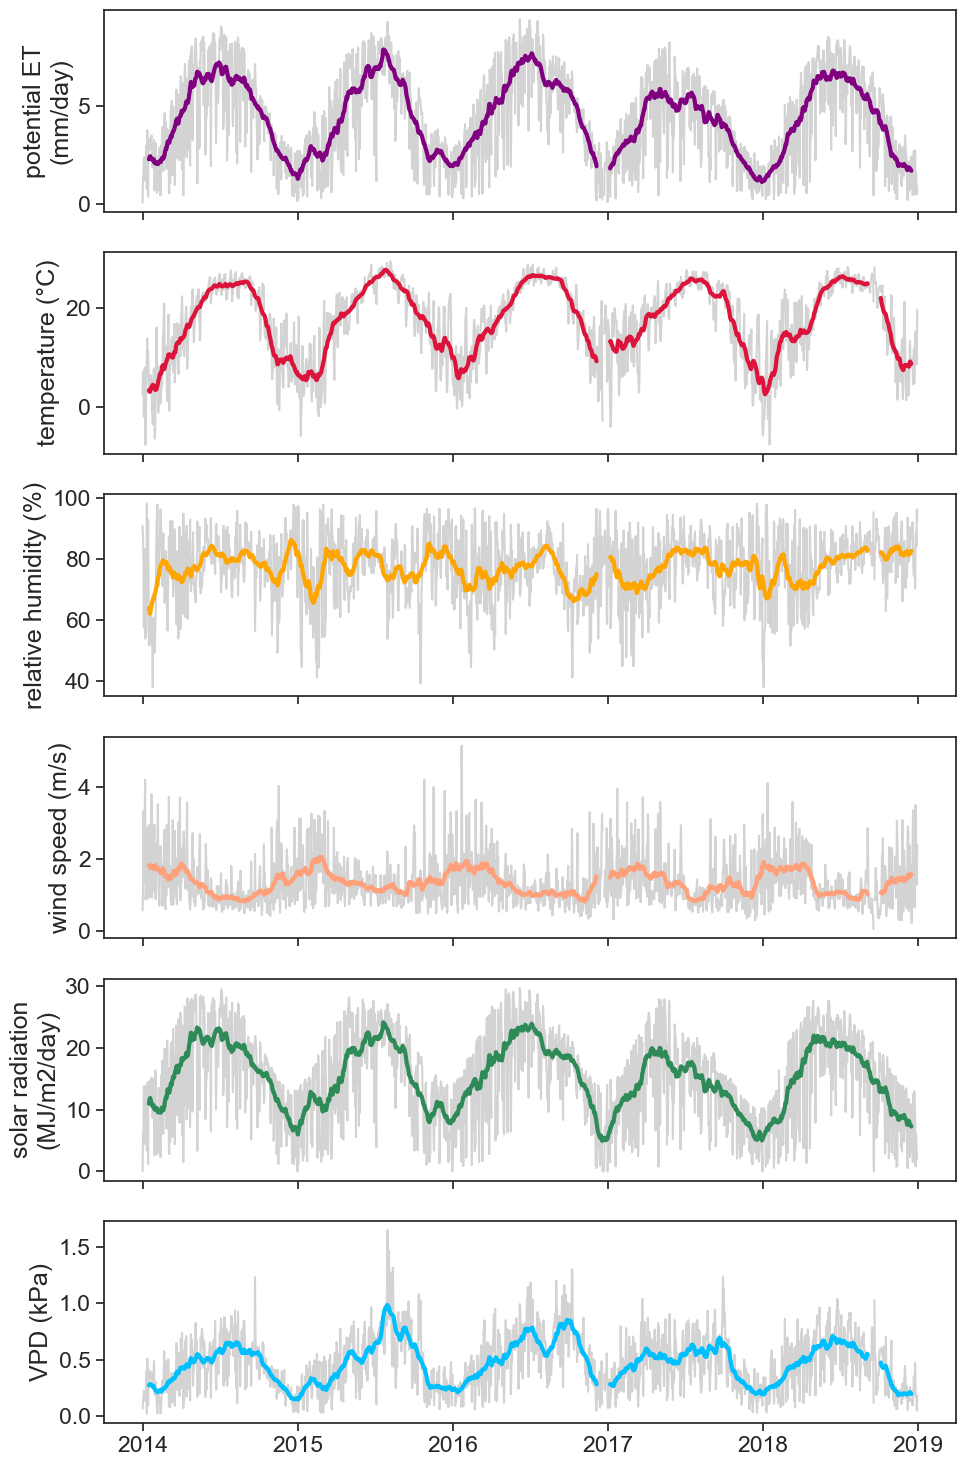

In [35]:
# plot PET with other variables with monthly rolling mean
fig, ax = plt.subplots(6,1, figsize=(10,15), sharex=True)
ax[0].plot(penm, color='lightgray'); ax[0].set_ylabel("potential ET\n(mm/day)")
ax[0].plot(penm.rolling(window=30, center=True).mean(), linewidth=3, color="purple", zorder=5)

ax[1].plot(combined_ET['AIR_TEMPERATURE'], color='lightgray'); ax[1].set_ylabel("temperature (°C)")
ax[1].plot(combined_ET['AIR_TEMPERATURE'].rolling(window=30, center=True).mean(), linewidth=3, color="crimson", zorder=5)

ax[2].plot(combined_ET['RELATIVE_HUMIDITY'], color='lightgray'); ax[2].set_ylabel("relative humidity (%)")
ax[2].plot(combined_ET['RELATIVE_HUMIDITY'].rolling(window=30, center=True).mean(), linewidth=3, color="orange", zorder=5)

ax[3].plot(combined_ET['WIND_1_5'], color='lightgray'); ax[3].set_ylabel("wind speed (m/s)")
ax[3].plot(combined_ET['WIND_1_5'].rolling(window=30, center=True).mean(), linewidth=3, color="lightsalmon", zorder=5)

ax[4].plot(combined_ET['SOLAR_RADIATION'], color='lightgray'); ax[4].set_ylabel("solar radiation\n(MJ/m2/day)")
ax[4].plot(combined_ET['SOLAR_RADIATION'].rolling(window=30, center=True).mean(), linewidth=3, color="seagreen", zorder=5)

ax[5].plot(vpd, color='lightgray'); ax[5].set_ylabel("VPD (kPa)")
ax[5].plot(vpd.rolling(window=30, center=True).mean(), linewidth=3, color="deepskyblue", zorder=5)

plt.tight_layout()

### Streamflow

In [36]:
df_q_daily_max = (df_q['discharge'].resample('D').max()).to_frame() # Resample to daily mean discharge

df_q_month = (df_q['discharge'].resample('M').sum()*60*60).to_frame()  #monthly frequency

df_q_year = (df_q['discharge'].resample('A-SEP').sum()*60*60).to_frame()  # yearly frequency, anchored end of September
df_q_year = df_q_year.iloc[:-1]  # exclude last row

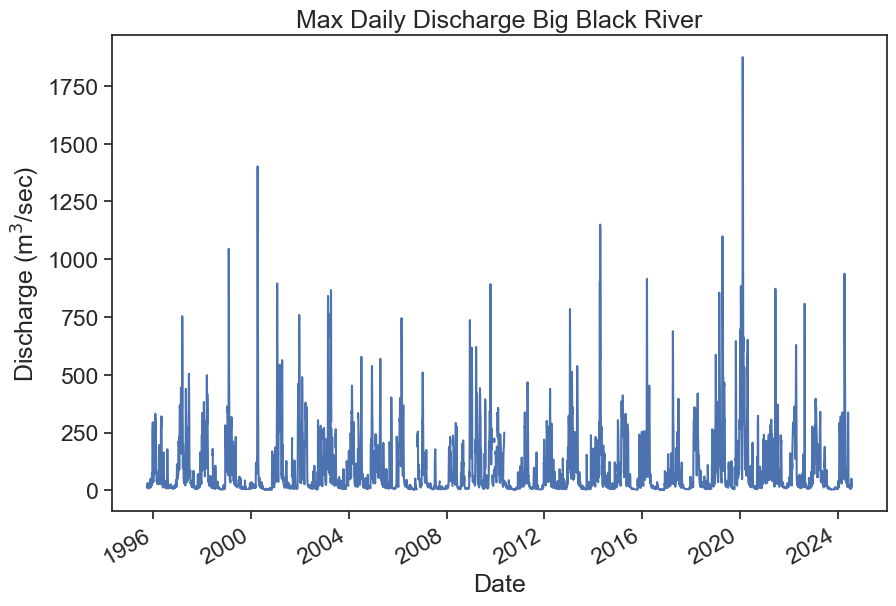

In [67]:
# ploting discharge daily max 
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_q_daily_max['discharge'])
plt.gcf().autofmt_xdate()
ax.set(xlabel="Date",
       ylabel=r"Discharge (m$^3$/sec)",
       title='Max Daily Discharge Big Black River');

#### Annual discharge accounting precipitation

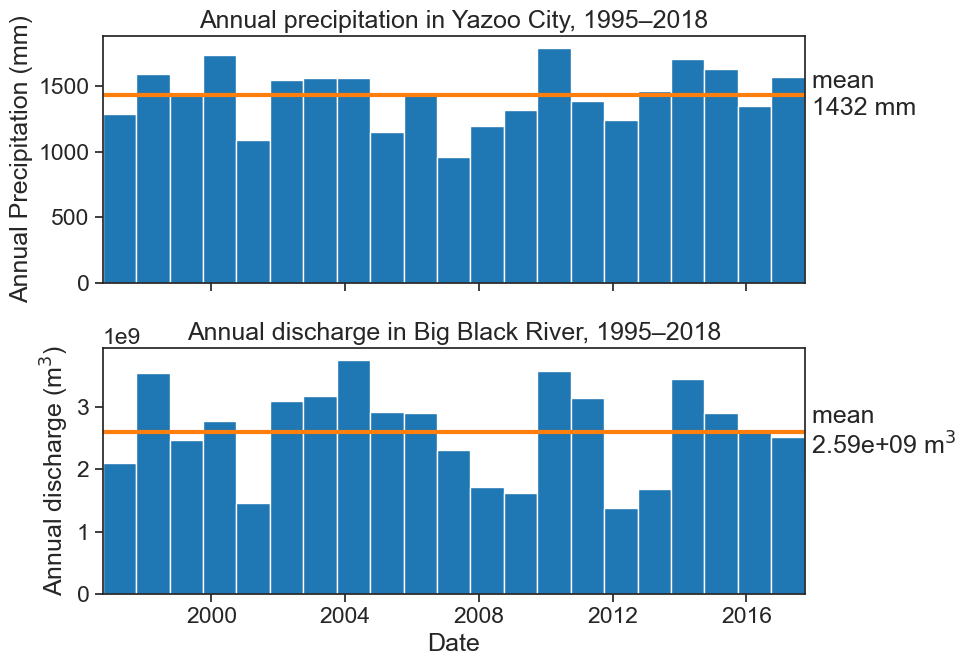

In [70]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,7), sharex=True)

# plot YEARLY precipitation
ax[0].bar(df_p_year['1996-09-30':].index, df_p_year['rain (mm)']['1996-09-30':],
       width=365, align='edge', color="tab:blue")

# plot mean
rain_mean = df_p_year['rain (mm)']['1996-09-30':].mean()
ax[0].plot(df_p_year['1996-09-30':]*0 + rain_mean, linewidth=3, color="tab:orange")

# adjust labels, ticks, title, etc
ax[0].set(title="Annual precipitation in Yazoo City, 1995–2018",
      
       ylabel="Annual Precipitation (mm)",
       xlim=[df_p_year['1996-09-30':].index[0], df_p_year['1996-09-30':].index[-1]]
      )

# write mean on the right
ax[0].text(df_p_year['1996-09-30':].index[-1], rain_mean, " mean\n {:.0f} mm".format(rain_mean),
        horizontalalignment="left", verticalalignment="center");

# plot YEARLY discharge
ax[1].bar(df_q_year[:'2017-09-30'].index, df_q_year['discharge'][:'2017-09-30'],
       width=365, align='edge', color="tab:blue")

# plot mean
q_y_mean = df_q_year['discharge'][:'2017-09-30'].mean()
ax[1].plot(df_q_year[:'2017-09-30']*0 + q_y_mean, linewidth=3, color="tab:orange")

# adjust labels, ticks, title, etc
ax[1].set(title="Annual discharge in Big Black River, 1995–2018",
       xlabel="Date",
       ylabel="Annual discharge (m$^3$)",
       xlim=[df_q_year[:'2017-09-30'].index[0], df_q_year[:'2017-09-30'].index[-1]]
      )

# write mean on the right
ax[1].text(df_q_year[:'2017-09-30'].index[-1], q_y_mean, f" mean\n {q_y_mean:.2e} m$^3$",
        horizontalalignment="left", verticalalignment="center");

plt.tight_layout()

In [39]:
# define an index that will help to consider the precipitation when comparing through years
q_index = (df_q_year['discharge'][:'2017-09-30'])/df_p_year['rain (mm)']['1996-09-30':]

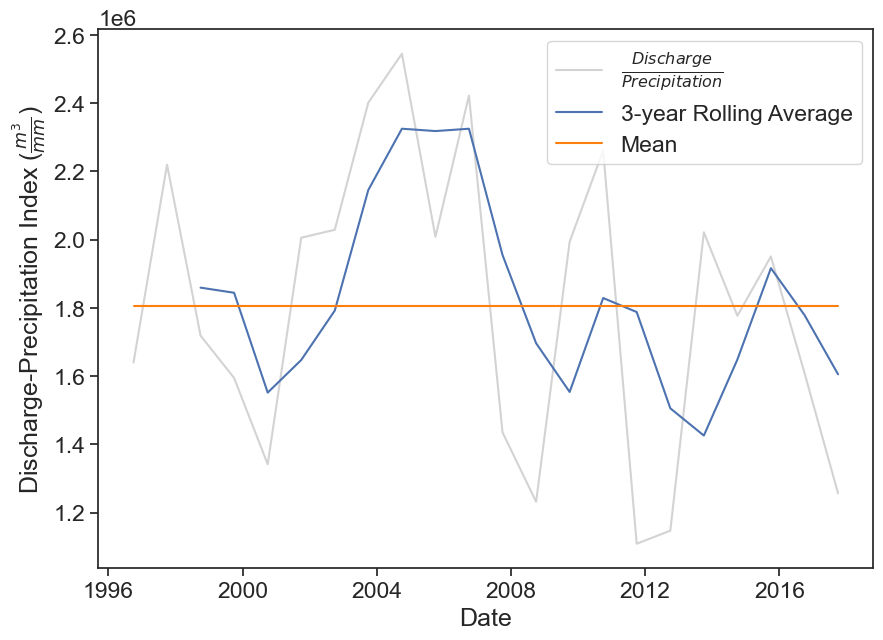

In [40]:
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY discharge-precipitation index
ax.plot(q_index.index, q_index.values, label= '$\\frac{Discharge}{Precipitation}$', color="lightgray")
# plot 3-year rolling average
ax.plot(q_index.index,q_index.rolling(window=3).mean(), label='3-year Rolling Average')
#plot mean
ax.plot(q_index*0 + q_index.values.mean(), color="tab:orange", label='Mean')
ax.set(xlabel='Date' ,ylabel='Discharge-Precipitation Index ($\\frac{m^3}{mm}$)')
plt.legend()


#### Trends for annual discharge

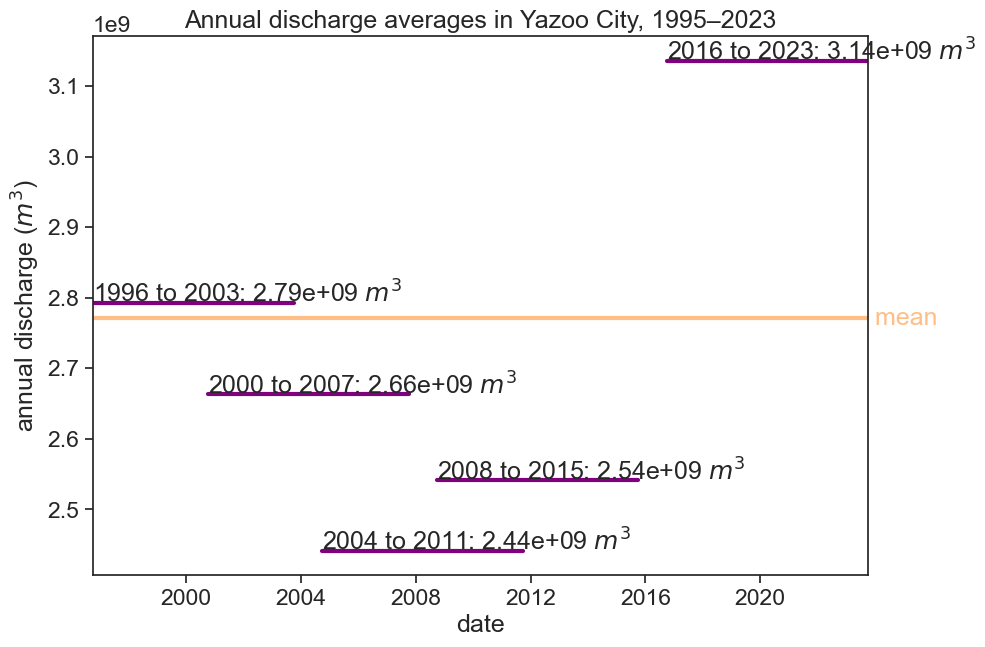

In [41]:
fig, ax = plt.subplots(figsize=(10,7))

# windows of length 10 years
windows = [[x,x+7] for x in [1996,2000,2004,2008,2016]]
for window in windows:
    start_date = f"{window[0]:d}-09-30"
    end_date = f"{window[1]:d}-09-30"
    window_mean = df_q_year['discharge'][start_date:end_date].mean()
    ax.plot(df_q_year[start_date:end_date]*0+window_mean, color="purple", linewidth=3)
    ax.text(start_date, window_mean+0.5, f"{window[0]} to {window[1]}: {window_mean:.2e} $m^3$",)

# plot mean
q_y_mean = df_q_year['discharge'].mean()
ax.plot(df_q_year*0 + q_y_mean, linewidth=3, color="tab:orange", alpha=0.5)
ax.text(df_q_year.index[-1], q_y_mean, " mean".format(q_y_mean),
        horizontalalignment="left", verticalalignment="center",
        color="tab:orange", alpha=0.5)

# adjust labels, ticks, title, limits, etc
ax.set(title="Annual discharge averages in Yazoo City, 1995–2023",
       xlabel="date",
       ylabel="annual discharge ($m^3$)",
       xlim=[df_q_year.index[0], df_q_year.index[-1]],
      );


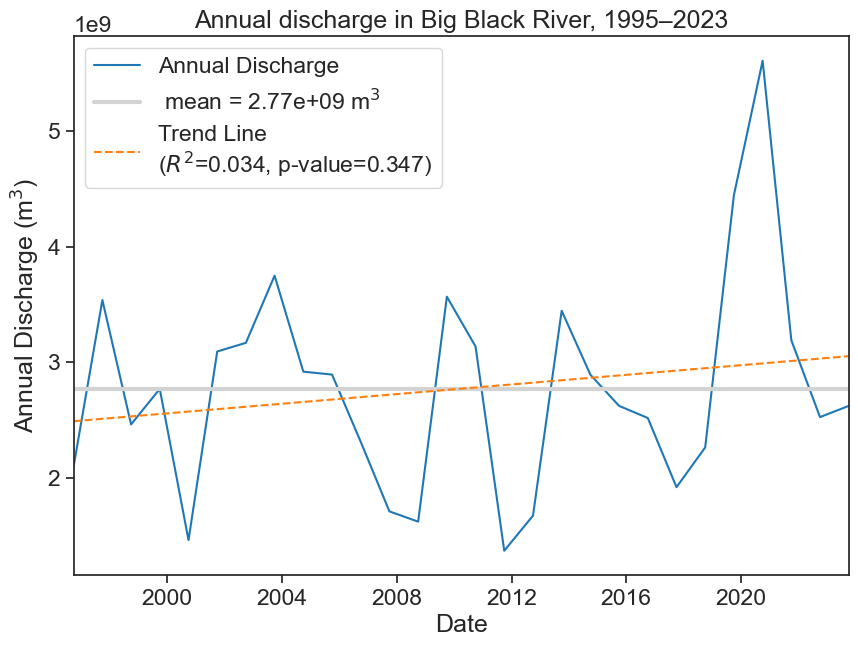

In [73]:
fig, ax = plt.subplots(figsize=(10,7))

# plot YEARLY discharge
ax.plot(df_q_year.index, df_q_year['discharge'],color="tab:blue", label='Annual Discharge')

# plot mean
q_y_mean = df_q_year['discharge'].mean()
ax.plot(df_q_year*0 + q_y_mean, linewidth=3, color="lightgray", label=f" mean = {q_y_mean:.2e} m$^3$")

# Prepare data for regression
X1 = np.array((df_q_year.index.year - df_q_year.index.year[0]).tolist()).reshape(-1, 1)
y1 = df_q_year['discharge'].values
# Fit a linear regression model
model1 = LinearRegression().fit(X1, y1)
# Calculate p-value for the slope
slope1, intercept1, r_value1, p_value1, std_err1 = scipy.stats.linregress(X1.flatten(), y1)
# Plot the trend with the regression line
ax.plot(df_q_year.index, model1.predict(X1), color='tab:orange', linestyle='--', 
        label=f'Trend Line\n($R^2$={r_value1**2:.3f}, p-value={p_value1:.3f})')

# adjust labels, ticks, title, etc
ax.set(title="Annual discharge in Big Black River, 1995–2023",
       xlabel="Date",
       ylabel="Annual Discharge (m$^3$)",
       xlim=[df_q_year.index[0], df_q_year.index[-1]]
      )

plt.legend()

In [43]:
# Define the high discharge threshold 
high_discharge_threshold = df_q_daily_max['discharge'].quantile(0.95)

# Create a column indicating high discharge days
df_q_daily_max['high_discharge'] = df_q_daily_max['discharge'] > high_discharge_threshold

# Resample to yearly frequency and count high discharge days
df_q_highdays = df_q_daily_max['high_discharge'].resample('A-SEP').sum()

Slope of the trend line: 0.235


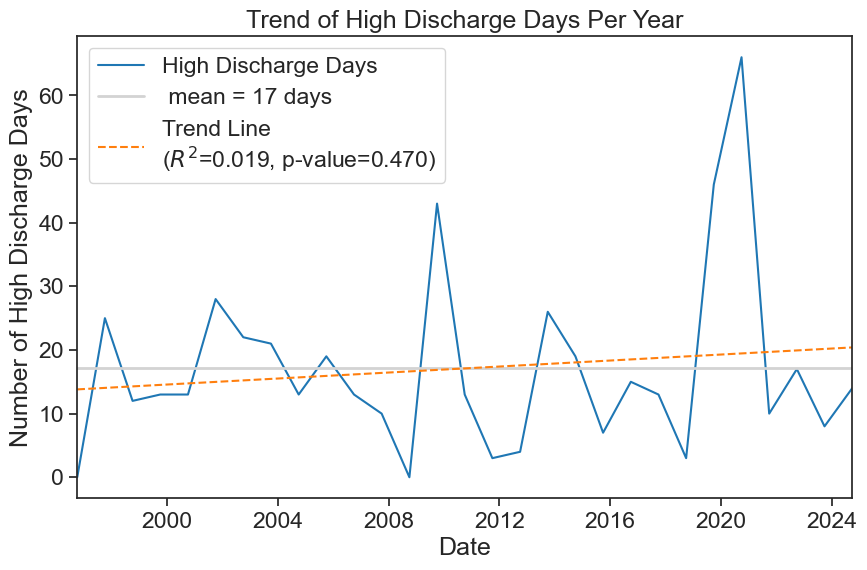

In [76]:
figure, ax = plt.subplots(figsize=(10, 6))

# plot high-discharge days
ax.plot(df_q_highdays.index, df_q_highdays.values, linestyle='-',color="tab:blue", label='High Discharge Days')

#plot mean
ax.plot(df_q_highdays*0 + df_q_highdays.values.mean(), linewidth=2, color="lightgray" , label=f" mean = {df_q_highdays.values.mean():.0f} days")

# Prepare data for regression
X2 = np.array((df_q_highdays.index.year - df_q_highdays.index.year[0]).tolist()).reshape(-1, 1)
y2 = df_q_highdays.values
# Fit a linear regression model
model2 = LinearRegression().fit(X2, y2)
# Calculate p-value for the slope
slope2, intercept2, r_value2, p_value2, std_err2 = scipy.stats.linregress(X2.flatten(), y2)

# Plot the trend with the regression line
ax.plot(df_q_highdays.index, model2.predict(X2), color='tab:orange', linestyle='--',
         label=f'Trend Line\n($R^2$={r_value2**2:.3f}, p-value={p_value2:.3f})')

# adjust labels, ticks, title, etc
ax.set(title='Trend of High Discharge Days Per Year',
        xlabel='Date', ylabel='Number of High Discharge Days',
        xlim=[df_q_highdays.index[0], df_q_highdays.index[-1]])
plt.legend()

# Print the slope of the trend line
print(f"Slope of the trend line: {model2.coef_[0]:.3f}")

#### Tree cover loss

In [45]:
# Read tree cover loss data for the area of yazoo city
df_treeloss = pd.read_csv('treecover_loss__ha.csv', usecols=['umd_tree_cover_loss__year',"umd_tree_cover_loss__ha"])
df_treeloss['Year'] = df_treeloss['umd_tree_cover_loss__year']
df_treeloss['Year'] = pd.to_datetime(df_treeloss['Year'], format='%Y')
df_treeloss['Year'] = df_treeloss['Year'].dt.year
df_treeloss = df_treeloss.set_index('Year')
df_treeloss


,umd_tree_cover_loss__year,umd_tree_cover_loss__ha
Year,,
2001,2001,691.989358
2002,2002,781.239161
2003,2003,430.245513
2004,2004,522.841574
2005,2005,739.634375
2006,2006,444.132559
2007,2007,607.372496
2008,2008,761.611152
2009,2009,442.919476


Text(2012, 1700, 'Total Tree Cover loss: 17.2 kha')

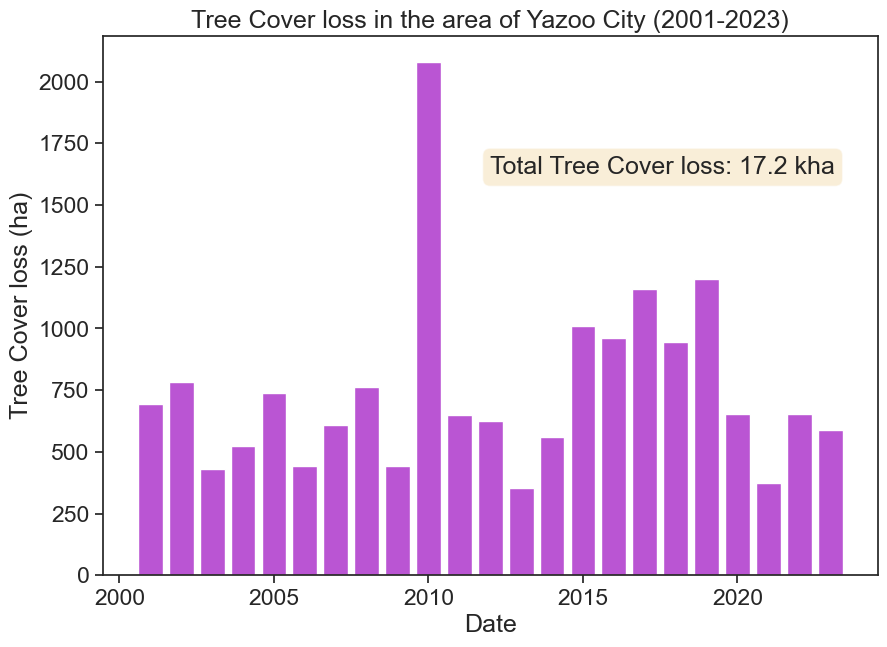

In [77]:
fig, ax = plt.subplots(figsize=(10,7))

# plot tree cover loss
ax.bar(df_treeloss.index,df_treeloss['umd_tree_cover_loss__ha'], color="mediumorchid")

ax.set(title='Tree Cover loss in the area of Yazoo City (2001-2023)',
        xlabel='Date',
       ylabel='Tree Cover loss (ha)')

total_loss = df_treeloss['umd_tree_cover_loss__ha'].sum()/1000 # calculate total tree cover loss in kha

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(2012, 1700, f'Total Tree Cover loss: {total_loss:.1f} kha'
        , fontsize=18, verticalalignment='top', bbox=props) # add a box with total tree cover loss